## Zadanie 1 (20pkt)

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats

**(2p)** Załaduj dane z adresu http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric do `DataFrame`. Dane nie mają nagłówka. Użyj adresu URL w wywołaniu funkcji, a nie lokalnego pliku.

In [106]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric"
df = pd.read_csv(url, delim_whitespace=True, header=None)

C:\Users\Andrzej\AppData\Local\Temp\ipykernel_5460\1724655971.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, header=None)


In [107]:
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,17,1,4,2,4,1,31,...,0,0,1,0,0,1,0,1,0,1
996,1,30,2,39,1,3,1,4,2,40,...,0,1,1,0,0,1,0,0,0,1
997,4,12,2,8,1,5,3,4,3,38,...,0,0,1,0,0,1,0,0,1,1
998,1,45,2,18,1,3,3,4,4,23,...,0,0,1,0,0,0,0,0,1,2


**(1p)** Zmień nazwę ostatniej kolumny na `target`. Kolumna informuje o niespłacaniu kredytu przez klienta - 2 => klient nie spłaca kredytu, 1=> klient spłaca kredyt. Przekoduj `target` tak, aby klienci nie spłacający kredytu byli oznaczeni jako 1 i 0 w przeciwnym przypadku.

In [108]:
df = df.rename(columns={col: f'v{idx}' for idx, col in enumerate(df.columns[:-1], start=1)})
df = df.rename(columns={df.columns[-1]: 'target'})

In [109]:
df['target'] = df['target'].apply(lambda x: 1 if x == 2 else 0)

In [110]:
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v16,v17,v18,v19,v20,v21,v22,v23,v24,target
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,0
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,1
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,0
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,0
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,1


**(3p)** Sprawdź liczebności wartości zmiennej `target`. W jaki sposób można rozwiązać problem niezbilansowanych danych? Podaj co najmniej 3 sposoby.

In [111]:
target_counts = df['target'].value_counts()
print("Liczba kategorii zmiennej target:")
target_counts

Liczba kategorii zmiennej target:


target
0    700
1    300
Name: count, dtype: int64

Problem niezbilansowanych danych można rozwiązac np. poprzez:
- Oversampling
- Undersampling
- SMOTE

**(2p)** Podziel dane na zbiór treningowy **(80%)** i walidacyjny **(20%)** z ziarnem losowości **12**. Zmienną celu jest `target`, wszystkie pozostałe zmienne są predyktorami.

In [112]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)

**(2p)** Wytrenuj regresję logistyczną `sklearn.linear_model.LogisticRegression`. Upewnij się, że model **nie jest** regularyzowany. Ile współczynników różnych od 0 występuje w zbudowanym modelu?

In [113]:
REG = LogisticRegression(penalty=None, max_iter=1000)
REG.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty=None)

In [114]:
params_no_0 = (REG.coef_ != 0).sum() + (REG.intercept_ != 0).sum()
print("Params różne od 0:", params_no_0)

Params różne od 0: 25


# Współczynników różnych od 0: 25

**(2p)** Przeprowadź selekcję zmiennych (zbuduj nowy model `sklearn.linear_model.LogisticRegression`) poprzez ustawienie odpowiedniego typu regularyzacji. Ustaw ziarno losowości na **11** i ustaw parametr odpowiadający za siłę regularyzacji na **0.5**. Ile współczynników modelu jest równych 0? 

# Wybrano regularyzację L1 (LASSO), umożliwia przeprowadzenie selekcji zmiennych

In [115]:
lg_l1_reg = LogisticRegression(penalty='l1', C=0.5, solver='liblinear', random_state=11)
lg_l1_reg.fit(X_train, y_train)

LogisticRegression(C=0.5, penalty='l1', random_state=11, solver='liblinear')

In [116]:
print(f"Współczynników równe 0: {(lg_l1_reg.coef_ == 0).sum()}")

Współczynników równe 0: 3


# Liczba współczynników równych 0: 3

**(2p)** Opisz krótko czym jest regularyzacja modeli i dlaczego jest stosowana.

Regularyzacja modeli to technika stosowana w celu zapobiegania przeuczeniu, czyli sytuacji, w której model zbyt dobrze dopasowuje się do danych treningowych kosztem zdolności generalizacji na nowych danych. Polega na wprowadzeniu dodatkowych ograniczeń w procesie trenowania modelu, takich jak dodanie kar za złożoność modelu w funkcji kosztu. Dzięki temu model staje się bardziej odporny na szum w danych i lepiej radzi sobie z różnorodnymi danymi testowymi, co prowadzi do poprawy jego ogólnej wydajności.

**(3p)** Używając modelu po selekcji zmiennych policz sumaryczny koszt predykcji na zbiorze walidacyjnym. Koszty cząstkowe:
* True Negative: **1**, 
* False Positive: **3**, 
* False Negative:  **6**. 

Użyj progu odcięcia równego **0.6**.

In [117]:
y_pred = (lg_l1_reg.predict_proba(X_val)[:, 1] >= 0.6).astype(int)
confusion_matrix = pd.crosstab(y_val, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,125,5
1,50,20


In [118]:
false_p = confusion_matrix.loc[0, 1]
false_n = confusion_matrix.loc[1, 0]
print("Koszt predykcji:", 3 * false_p + 6 * false_n)

Koszt predykcji: 315


# Koszt predykcji: 315

**(3p)** Dana jest następująca macierz trafności:

Wartości predykcji są w kolumnach, wartości rzeczywiste w wierszach.

| A\P | 1   | 0   |
|-----|-----|-----|
| 1   | 213 | 700 |
| 0   | 420 | 123 |

Policz:
* Accuracy
* Precision
* Recall
* F1-score

In [15]:
FP = 420
FN = 700
TN = 123
TP = 213

In [16]:
Accuracy=(TP + TN) / (TP + TN + FP + FN)
Precision =TP / (TP + FP)
Recall= TP / (TP + FN)
F1_score = 2 * (Precision * Recall) / (Precision + Recall)

print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1-score:", F1_score)

Accuracy: 0.23076923076923078
Precision: 0.33649289099526064
Recall: 0.23329682365826945
F1-score: 0.27554980595084083


- Accuracy: 0.23076923076923078
- Precision: 0.33649289099526064
- Recall: 0.23329682365826945
- F1-score: 0.27554980595084083

## Zadanie 2 (12 pkt)

**(1p)** Załaduj dane z adresu https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv do `DataFrame`. Użyj adresu URL w wywołaniu funkcji, a nie lokalnego pliku.

In [39]:
df_titanic = pd.read_csv("https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")
df_titanic

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


**(1p)** Usuń ze zbioru wszyskiego zmienne typu `object`.

In [40]:
data_types = df_titanic.dtypes
data_types

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [41]:
df_titanic.drop(columns=['Name','Sex'], inplace=True)

In [42]:
df_titanic.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


**(1p)** Podziel dane na zbiór treningowy **(75%)** i walidacyjny **(25%)** z ziarnem losowości **42**. Zmienną celu jest `Survived`, wszystkie pozostałe zmienne są predyktorami.

In [43]:
X = df_titanic.drop(columns='Survived')
y = df_titanic.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**(2p)** Zbuduj model `sklearn.tree.DecisionTreeClassifier` z parametrem `random_state` równym **32** i parametrem kosztu równym **0**. Ile liści zawiera wytrenowane drzewo?

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dt_classifier = DecisionTreeClassifier(random_state=32, ccp_alpha=0.0)
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=32)

In [47]:
n_leaves = dt_classifier.get_n_leaves()
n_leaves

np.int64(225)

# Liczba liści: 225

**(2p)** Czemu służy **przycinanie** drzewa CART? W jaki sposób parametr kosztu wpływa na przycinanie drzewa w modelu `sklearn.tree.DecisionTreeClassifier`?

- Przycinanie drzewa CART polega na usuwaniu nieistotnych gałęzi, które mogą prowadzić do nadmiernego dopasowania modelu (overfitting). Celem jest uproszczenie drzewa, aby poprawić jego zdolność do generalizacji na nowych danych. Proces ten polega na ocenie, które podziały w drzewie są niewiele istotne dla poprawności predykcji, a następnie ich usunięciu lub zastąpieniu prostszymi decyzjami. Dzięki przycinaniu zmniejsza się złożoność modelu.
- Parametr kosztu w modelu DecisionTreeClassifier określa kompromis między złożonością drzewa a błędem dopasowania. Wyższa wartość prowadzi do silniejszego karania za złożoność drzewa, co skutkuje usuwaniem większej liczby gałęzi.

**(3p)** Przeprowadź przycinanie stworzonego drzewa poprzez dobór parametru kosztu. Wykorzystaj **przeszukiwanie po siatce** dla **50** wartości parametru kosztu od 0 do maksymalnej wartości parametru kosztu uzyskanej z metody `cost_complexity_pruning_path` drzewa zbudowanego dwa podpunkty wyżej (wykorzystaj zbiór treningowy w wywołaniu metody). Użyj **AUC** jako metryki jakości. Ziarno losowości dla wszystkich modeli ustaw na **42**. W trakcie tuningu nie korzystaj z walidacji krzyżowej, tylko z wydzielonych wcześniej zbiorów: treningowego i walidacyjnego.

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
imdb_tree = dt_classifier.fit(X_train,y_train)
path = imdb_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[::4]
ccp_alphas

array([0.        , 0.00010025, 0.00030075, 0.00042965, 0.00050125,
       0.00075188, 0.00095497, 0.00100251, 0.00107411, 0.00112782,
       0.00120301, 0.00125313, 0.00133668, 0.00150376, 0.00176972,
       0.00189415, 0.0020432 , 0.00227388, 0.00251207, 0.00280702,
       0.00394858, 0.00508449, 0.01298612])

In [50]:
max_cs = max(ccp_alphas)

param_grid = {'ccp_alpha': np.linspace(0, max_cs, 50)}
dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_classifier, param_grid, scoring='roc_auc') # def cv=None
# scoring -> https://scikit-learn.org/1.5/modules/model_evaluation.html#scoring-parameter

**(2p)** Podaj optymalną wartość complexity parameter. Podaj AUC przyciętego drzewa na zbiorze treningowym oraz walidacyjnym - skomentuj czy występuje zjawisko przeuczenia modelu.

In [51]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': array([0.        , 0.00026502, 0.00053005, 0.00079507, 0.00106009,
       0.00132511, 0.00159014, 0.00185516, 0.00212018, 0.0023852 ,
       0.00265023, 0.00291525, 0.00318027, 0.0034453 , 0.00371032,
       0.00397534, 0.00424036, 0.00450539, 0.00477041, 0.00503543,
       0.00530046, 0.00556548, 0.0058305 , 0.00609552, 0.00636055,
       0.00662557, 0.00689059, 0.00715561, 0.00742064, 0.00768566,
       0.00795068, 0.00821571, 0.00848073, 0.00874575, 0.00901077,
       0.0092758 , 0.00954082, 0.00980584, 0.01007087, 0.01033589,
       0.01060091, 0.01086593, 0.01113096, 0.01139598, 0.011661  ,
       0.01192602, 0.01219105, 0.01245607, 0.01272109, 0.01298612])},
             scoring='roc_auc')

In [52]:
grid_search.best_params_

{'ccp_alpha': np.float64(0.0037103188811029825)}

In [53]:
from sklearn.metrics import roc_auc_score

In [54]:
y_train_pred = grid_search.predict(X_train)
auc_t = roc_auc_score(y_train, y_train_pred)
print("AUC train :", auc_t)

AUC train : 0.7063627730294397


In [55]:
y__pred = grid_search.predict(X_test)
auc_v = roc_auc_score(y_test, y__pred)
print("AUC val:", auc_v)

AUC val: 0.6304006968641115


### AUC na danych treningowych jest nieco wyższy niż na danych walidacyjnych. Możliwe, że model jest nieco przeuczony, ale różnica w AUC nie jest duża.

## Zadanie 3 (18 pkt)

**(1p)** Załaduj dane z adresu https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv do DataFrame. Użyj adresu URL w wywołaniu funkcji, a nie lokalnego pliku.

In [56]:
df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

In [57]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


**(1p)** Sprawdź czy w zbiorze występują braki danych.

In [58]:
df_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# braki dancyh nie występują

**(2p)** Stwórz wykres rozrzutu z przedstawionym oszacowaniem regresji liniowej. Użyj zmiennych:
* oś y - `alcohol`
* oś x - `residual sugar`

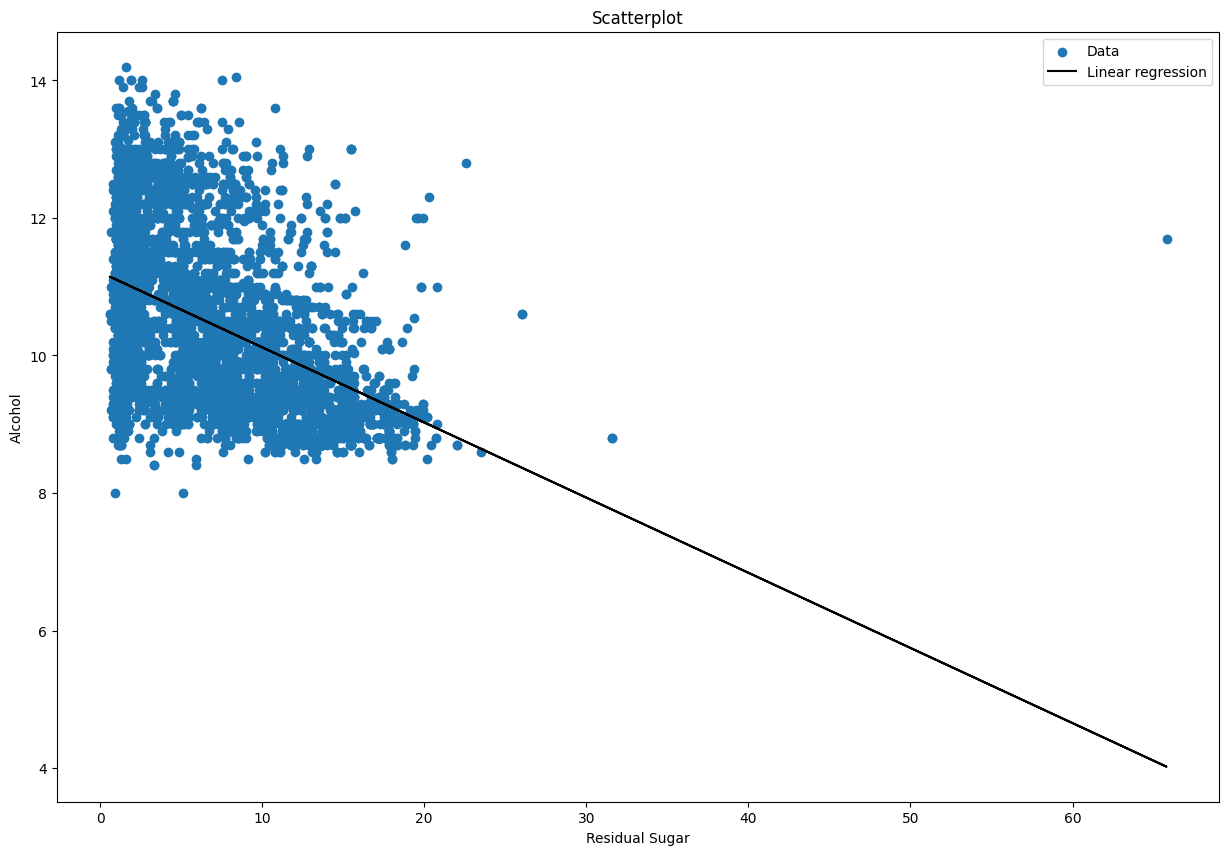

In [59]:
x = df_wine['residual sugar']
y = df_wine['alcohol']

slope, intercept = np.polyfit(x, y, 1)

plt.figure(figsize = (15,10))
plt.scatter(x, y, label='Data')
plt.plot(x, slope*x + intercept, color='black', label='Linear regression')
plt.xlabel('Residual Sugar')
plt.ylabel('Alcohol')
plt.title('Scatterplot')
plt.legend()
plt.show()

**(3p)** Wykres wskazuje na występowanie obserwacji odstających. Usuń wszystkie obserwacje z `residual sugar` większym niż 27. Wygeneruj ponownie wykres z poprzedniego punktu, aby potwierdzić usunięcie obserwacji odstających.

In [62]:
wine_no_outliers = df_wine[df_wine['residual sugar'] <= 27]

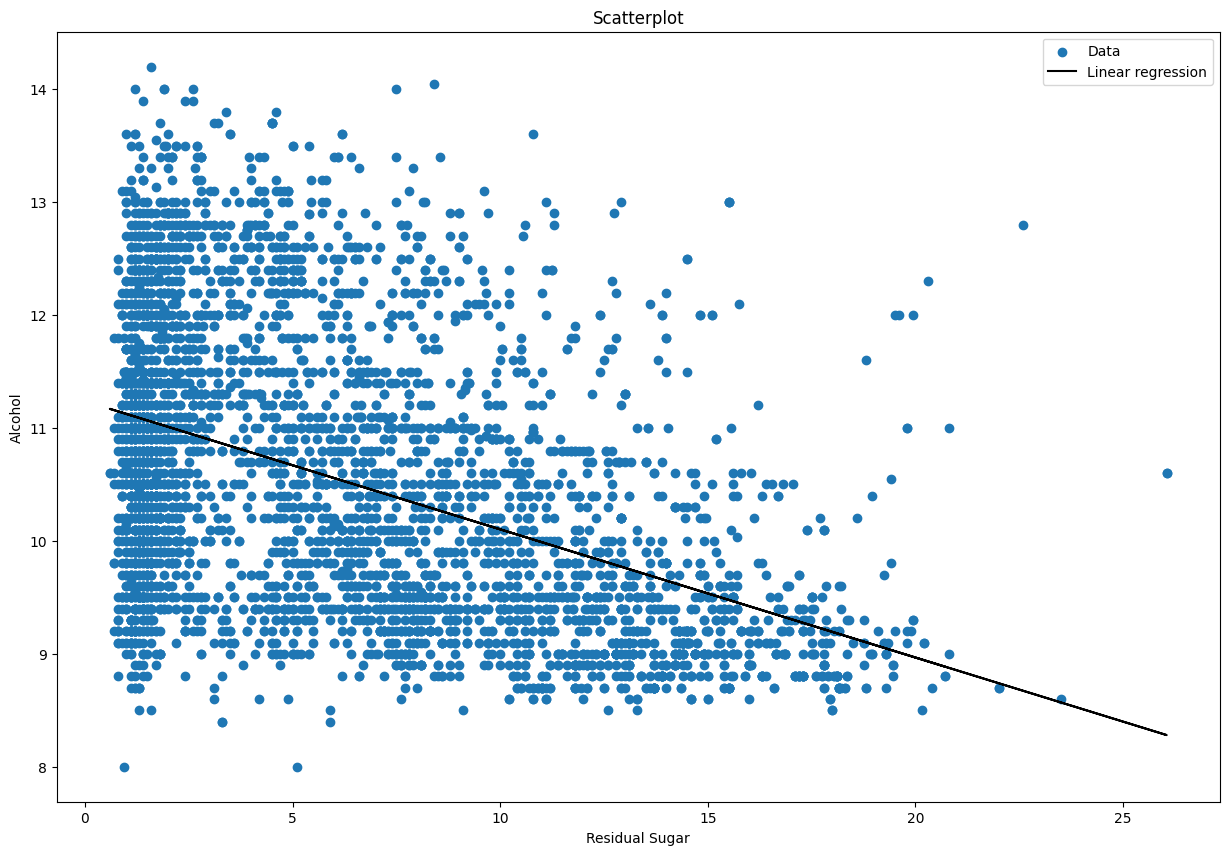

In [63]:
x = wine_no_outliers['residual sugar']
y = wine_no_outliers['alcohol']

slope, intercept = np.polyfit(x, y, 1)

plt.figure(figsize = (15,10))
plt.scatter(x, y, label='Data')
plt.plot(x, slope*x + intercept, color='black', label='Linear regression')
plt.xlabel('Residual Sugar')
plt.ylabel('Alcohol')
plt.title('Scatterplot')
plt.legend()
plt.show()

**(1p)** Przekoduj zmienną `quality`. Dobre wina (quality większe bądź równe **6**) niech będą oznaczone wartością 1, a słabe wina (quality mniejsze niż 6) wartością 0. Nadpisz kolumnę `quality`.

In [64]:
wine_no_outliers['quality'] = wine_no_outliers['quality'].map(lambda q: 1 if q >= 6 else 0)

In [65]:
wine_no_outliers['quality'].unique()

array([1, 0])

**(1p)** Podziel dane na zbiór treningowy **(80%)** i testowy **(20%)** z ziarnem losowości **12**. Zmienną celu jest `quality`, wszystkie pozostałe zmienne są predyktorami.

In [66]:
X = wine_no_outliers.drop(columns=['quality'])
y = wine_no_outliers['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

**(2p)** Przeprowadź tuning modelu `sklearn.ensemble.RandomForestClassifier`. Zoptymalizuj hiperparametr `max_features` za pomocą techniki przeszukiwania po siatce (sprawdź wartości od 1 do maksymalnej liczby predyktorów z krokiem 1) - użyj 3-krotnej walidacji krzyżowej i F1-score jako metryki decyzyjnej. Dla każdego stworzonego modelu użyj ziarna losowości **10** i liczbę drzew na **150**. Pozostałe parametry modelu pozostaw na wartościach domyślnych. 

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rand_forest = RandomForestClassifier(n_estimators=150, random_state=10)
param_grid = {'max_samples': np.arange(1, 11, 1)}
grid_search_rf = GridSearchCV(estimator=rand_forest, param_grid=param_grid, cv=3, scoring='f1')

In [86]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=150,
                                              random_state=10),
             param_grid={'max_samples': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='f1')

In [87]:
grid_search_rf.best_params_

{'max_samples': np.int64(10)}

In [88]:
grid_search_rf.best_score_

np.float64(0.8102485586387583)

**(2p)** Które 2 zmienne są najmniej istotne na podstawie **feature importance** optymalnego lasu? Podaj ich nazwy.

In [72]:
least_f = grid_search_rf.best_estimator_
feature_importances = least_f.feature_importances_
feature_importances

array([0.0560788 , 0.05965121, 0.10483475, 0.10207346, 0.10067523,
       0.08553199, 0.13404981, 0.11157762, 0.06807879, 0.08663235,
       0.09081599])

In [73]:
feature_importance_d = dict(zip(X_train.columns, feature_importances))
feature_importance_d

{'fixed acidity': np.float64(0.05607880201630202),
 'volatile acidity': np.float64(0.059651213713713715),
 'citric acid': np.float64(0.10483474545974547),
 'residual sugar': np.float64(0.10207345738595738),
 'chlorides': np.float64(0.10067522880022885),
 'free sulfur dioxide': np.float64(0.08553199245163534),
 'total sulfur dioxide': np.float64(0.1340498087373087),
 'density': np.float64(0.11157761715797433),
 'pH': np.float64(0.0680787930787931),
 'sulphates': np.float64(0.08663234663234665),
 'alcohol': np.float64(0.09081599456599458)}

In [74]:
sorted_f_importance = dict(sorted(feature_importance_d.items(), key=lambda item: item[1], reverse=True))
print('Najmniej istotne na podstawie feature importance optymalnego lasu:')
list(sorted_f_importance.items())

Najbardziej istotne na podstawie feature importance optymalnego lasu:


[('total sulfur dioxide', np.float64(0.1340498087373087)),
 ('density', np.float64(0.11157761715797433)),
 ('citric acid', np.float64(0.10483474545974547)),
 ('residual sugar', np.float64(0.10207345738595738)),
 ('chlorides', np.float64(0.10067522880022885)),
 ('alcohol', np.float64(0.09081599456599458)),
 ('sulphates', np.float64(0.08663234663234665)),
 ('free sulfur dioxide', np.float64(0.08553199245163534)),
 ('pH', np.float64(0.0680787930787931)),
 ('volatile acidity', np.float64(0.059651213713713715)),
 ('fixed acidity', np.float64(0.05607880201630202))]

# Najmniej istotne na podstawie feature importance optymalnego lasu: "fixed acidity" oraz "volatile acidity"

**(3p)** Przeprowadź tuning modelu `sklearn.ensemble.GradientBoostingClassifier`. 

Wykorzystując przeszukiwanie po siatce, zoptymalizuj dwa hiperparametry jednocześnie:
1. liczbę iteracji uczenia (sprawdź wartości od 100 do 250 co 50)
2. udział obserwacji ze zbioru danych wykorzystywany w każdej iteracji uczenia (sprawdź wartości 0.33, 0.66 i 1.0)

Dodatkowo użyj 3-krotnej walidacji krzyżowej i F1-score jako metryki decyzyjnej. Dla każdego stworzonego modelu użyj ziarna losowości **2**. Pozostałe parametry modelu pozostaw na wartościach domyślnych.

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

In [92]:
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'subsample': [0.33, 0.66, 1.0]
}

grad_busting = GradientBoostingClassifier(random_state=2)

In [93]:
grid_search_gb = GridSearchCV(estimator=grad_busting, param_grid=param_grid, cv=3, scoring='f1')

In [94]:
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=2),
             param_grid={'n_estimators': [100, 150, 200, 250],
                         'subsample': [0.33, 0.66, 1.0]},
             scoring='f1')

**(2p)** Porównaj jakość 2 stworzonych modeli (optymalny Random Forest, optymalny Gradient Boosted Trees) poprzez pomiar F1-score (na zbiorze testowym) i przedstaw wyniki na wykresie słupkowym. Który model jest lepszy pod kątem F1-score?

In [95]:
from sklearn.metrics import f1_score

In [96]:
# random forest
rf_pre = grid_search_rf.predict(X_test)
rf_f1 = f1_score(y_test, rf_pre)
rf_f1

np.float64(0.8174904942965779)

In [97]:
# gradient boositing
gb_pre = grid_search_gb.predict(X_test)
gb_f1 = f1_score(y_test, gb_pre)
gb_f1

np.float64(0.8461538461538461)

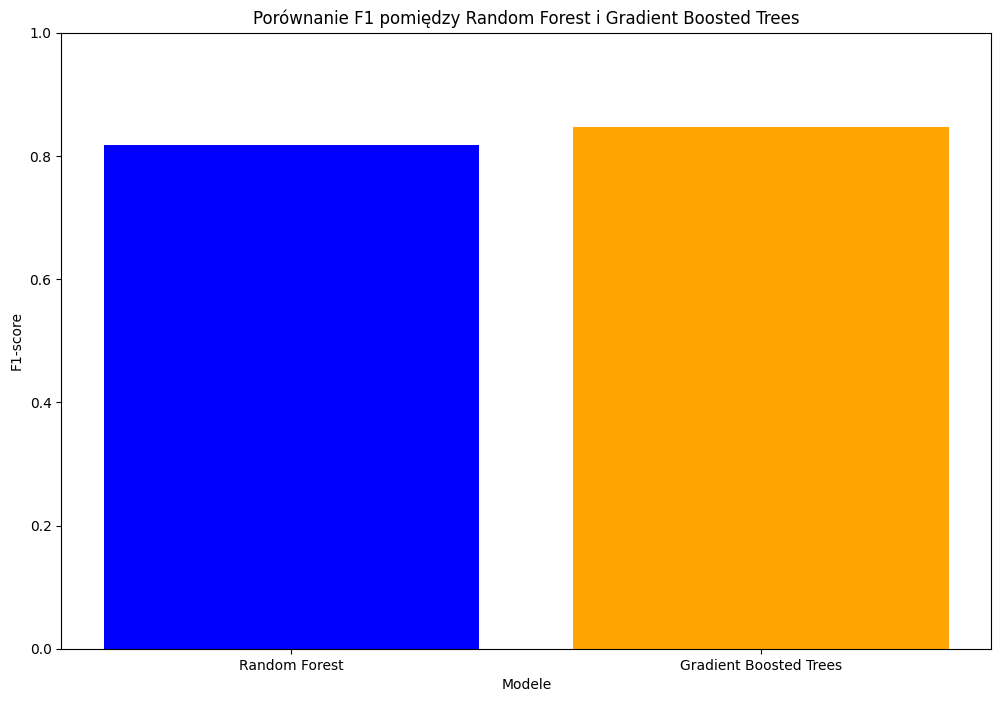

In [98]:
models = ['Random Forest', 'Gradient Boosted Trees']
f1_scores = [rf_f1, gb_f1]

plt.figure(figsize=(12,8))
plt.bar(models, f1_scores, color=['blue', 'orange'])
plt.xlabel('Modele')
plt.ylabel('F1-score')
plt.title('Porównanie F1 pomiędzy Random Forest i Gradient Boosted Trees')
plt.ylim(0, 1)
plt.show()

# Gradient Boosted Trees jest lepszy pod względem F1 score